# Image Import and Vizualisation
### start by converting you file to a tiff file. This can be done by using bio-formats bfconvert in the terminal 
### First we want to import the files and be able to display the images: 
#### - change the variable "file_path" to the file path of your converted tiff file
#### - Change the variable "frame_to_display" to the number of which ever frame you want to visualize in the cell below and run the code in the cell
#### The first cell will display the following: 
- Total number of frames
- The metadata of the chosen frame
- A histogram of the pixel intesities of that frame
- Gaussian Smoothing of the frame


Number of total frames: 392
Metadata for Frame 181 of 392
256: TiffTag 256 ImageWidth @1996953144 LONG8 @1996953156 = 2560
257: TiffTag 257 ImageLength @1996953164 LONG8 @1996953176 = 2160
258: TiffTag 258 BitsPerSample @1996953184 SHORT @1996953196 = 16
259: TiffTag 259 Compression @1996953204 SHORT @1996953216 = NONE
262: TiffTag 262 PhotometricInterpretation @1996953224 SHORT @1996953236 = MINISBLAC
270: TiffTag 270 ImageDescription @1996953244 ASCII[66] @1996953472 = ImageJ= hypers
273: TiffTag 273 StripOffsets @1996953264 LONG8[2160] @1996953538 = (1996988120, 199
277: TiffTag 277 SamplesPerPixel @1996953284 SHORT @1996953296 = 1
278: TiffTag 278 RowsPerStrip @1996953304 LONG8 @1996953316 = 1
279: TiffTag 279 StripByteCounts @1996953324 LONG8[2160] @1996970818 = (5120, 5120, 
282: TiffTag 282 XResolution @1996953344 RATIONAL @1996953356 = (61538461, 1000)
283: TiffTag 283 YResolution @1996953364 RATIONAL @1996953376 = (61538461, 1000)
284: TiffTag 284 PlanarConfiguration @19969533

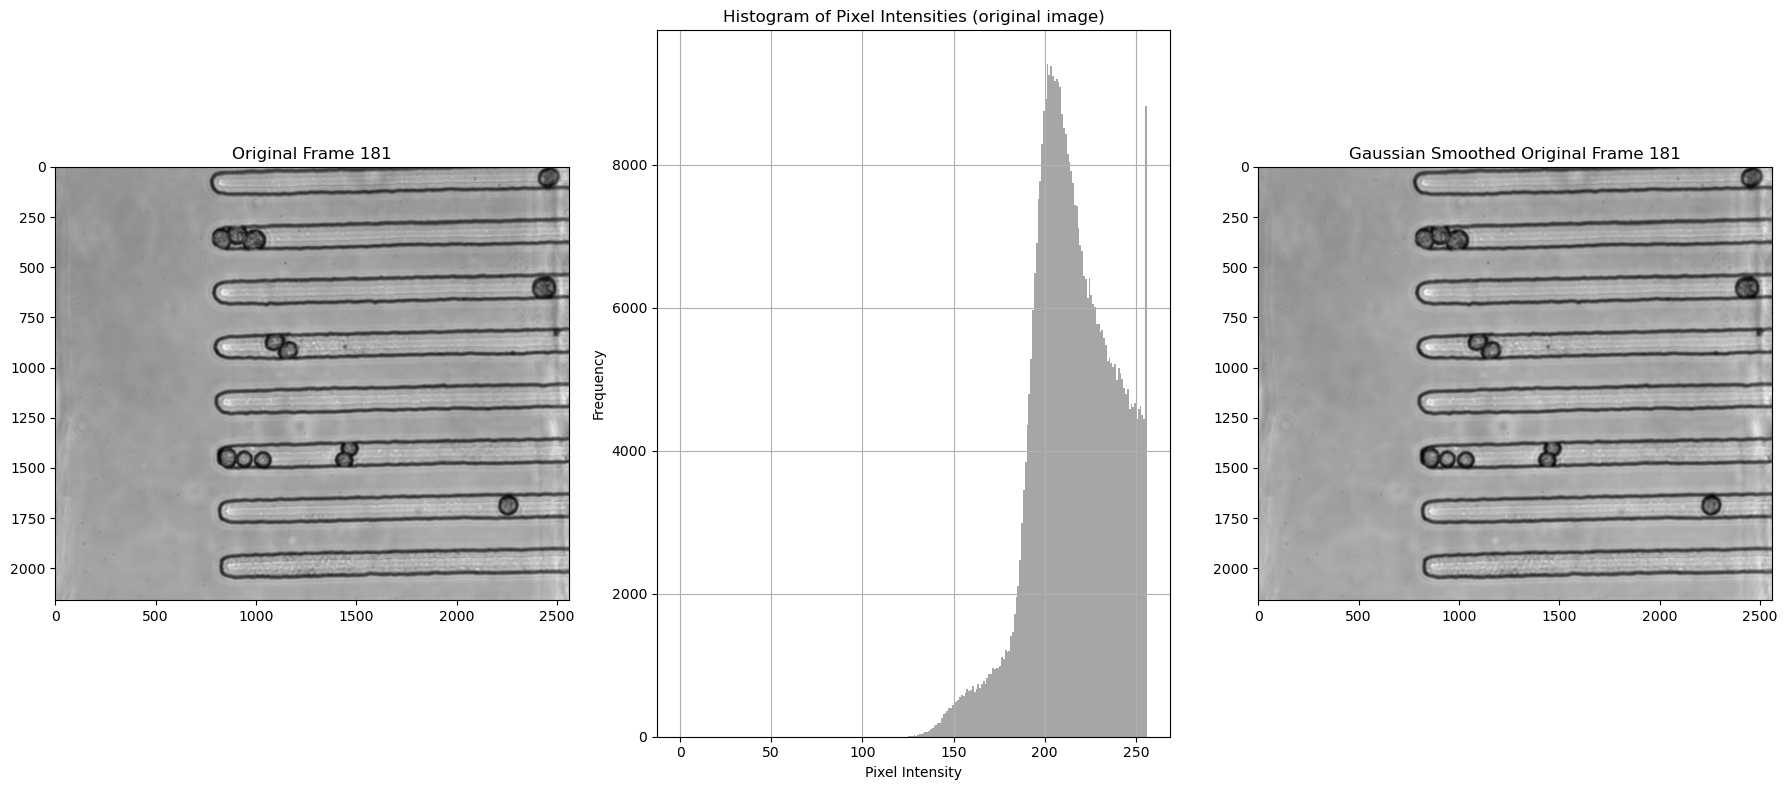

In [56]:
import tifffile
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Open the TIFF image file
file_path = "C:/Users/micha/Desktop/Master_Project/tiff_file_converted_2.tiff"
with tifffile.TiffFile(file_path) as tif:
    
    #Total number of frames in the tiff-file
    num_frames = len(tif.pages)
    print(f'Number of total frames: {num_frames}')  

    # Frame you want to display visually and metadata from (also downstream analysis) 
    #Number you want to dispaly + 1
    frame_to_display = 180

    #Extract Specific Frame:
    tiff_data = tif.asarray(key=frame_to_display) #This variable is the so called "original frame" used for downstream analysis 
    
    
    # Print metadata for the chosen frame
    print(f"Metadata for Frame {frame_to_display + 1} of {num_frames}")
    page = tif.pages[frame_to_display]
    for tag, value in page.tags.items():
        tag_name = str(tag)
        print(f"{tag_name}: {value}")
    
    
    # Add a separator between metadata and plots
    print("-" * 100)  

    # Create a 3x3 grid of subplots
    fig, axs = plt.subplots(1, 3, figsize=(18, 8))

    # Display the chosen frame
    axs[0].imshow(tiff_data, cmap='gray')
    axs[0].set_title(f"Original Frame {frame_to_display + 1}")

    # Calculate and display the histogram
    axs[1].hist(tiff_data.flatten(), bins=256, range=(0, 256), color='gray', alpha=0.7)
    axs[1].set_xlabel('Pixel Intensity')
    axs[1].set_ylabel('Frequency')
    axs[1].set_title('Histogram of Pixel Intensities (original image)')
    axs[1].grid(True)

    # Apply Gaussian noise reduction to the original frame
    smoothed_original_image = cv2.GaussianBlur(tiff_data, (9, 9), 0)  #Adjust kernel size (5, 5) as needed
    axs[2].imshow(smoothed_original_image, cmap='gray')
    axs[2].set_title(f"Gaussian Smoothed Original Frame {frame_to_display + 1}")


 # Adjust layout for better spacing
plt.tight_layout()

    # Show the plots
plt.show()
    
    
#plt.imsave('C:/Users/micha/Desktop/Master_Project/original_frame_392.png', tiff_data, cmap='gray')




# Preprocessing 
#### After importing the tiff-file and vizualising it we want to do preprocessing to make sure it is of good enoguh quality for downstream analysis 

### Histogram Equalization: 
#### The cell below wil display the following:
- Histogram Equalization on the original frame 
- A histogram of pixel intensities of the Equalized frame 
- Gaussian Smoothing of the Equalized frame

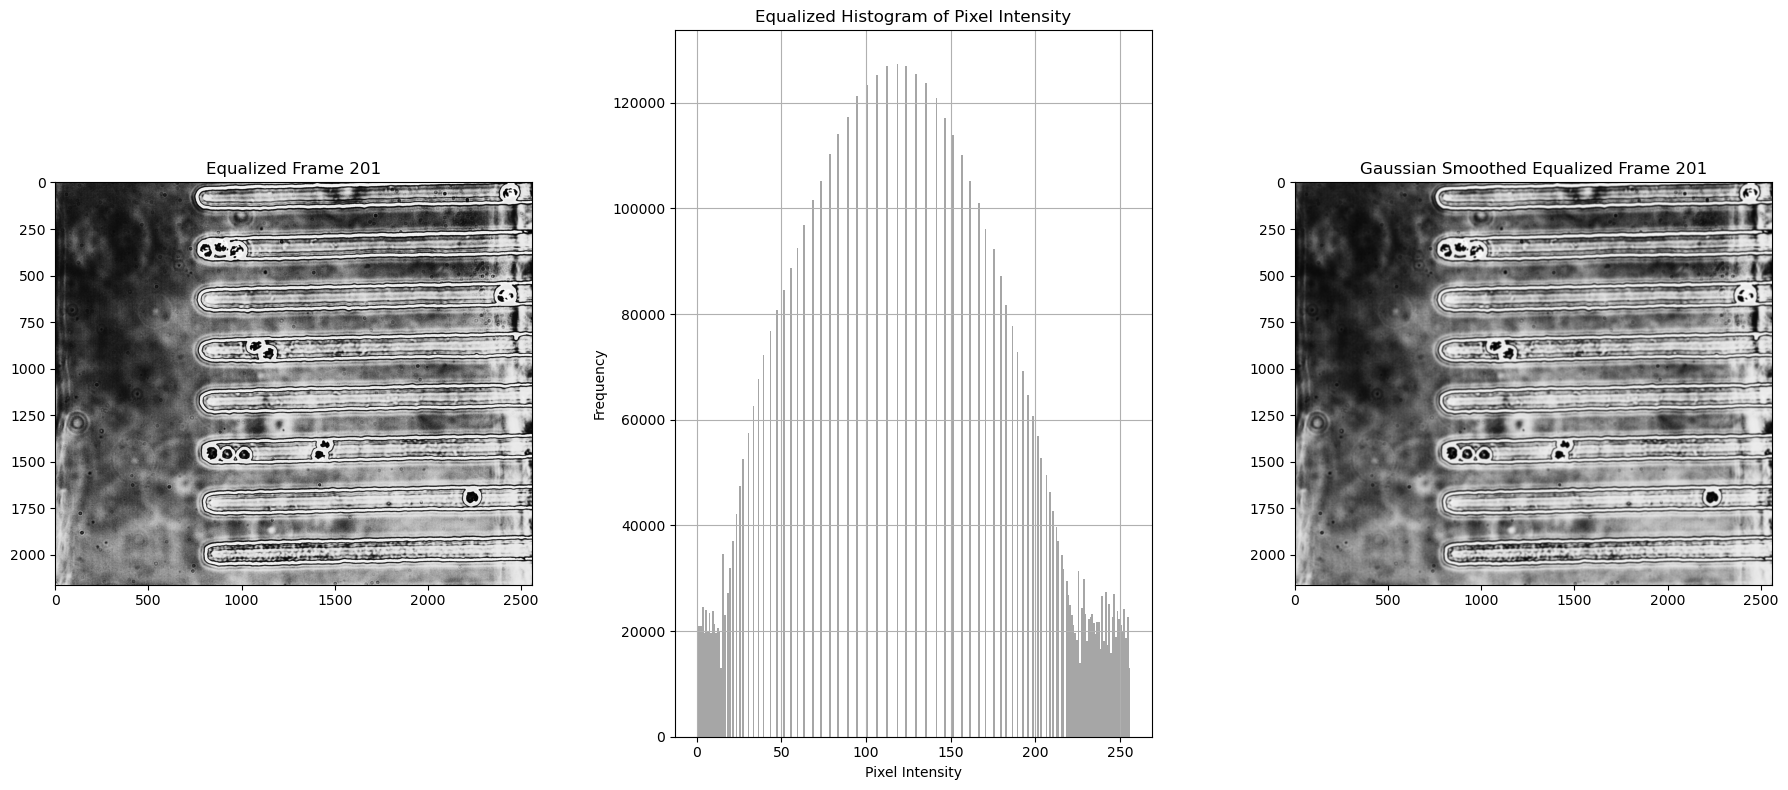

In [162]:
fig, axs = plt.subplots(1, 3, figsize=(18, 8))

# Perform histogram equalization
if tiff_data.shape[-1] == 3:
    tiff_data = cv2.cvtColor(tiff_data, cv2.COLOR_BGR2GRAY)

# Ensure the image is of the correct data type (CV_8UC1)
if tiff_data.dtype != np.uint8:
    tiff_data = tiff_data.astype(np.uint8)

    
#Perform the Histogram Equalization of the original frame
equalized_image = cv2.equalizeHist(tiff_data)


# Display the equalized image
axs[0].imshow(equalized_image, cmap='gray')
axs[0].set_title(f"Equalized Frame {frame_to_display + 1}")


# Calculate and display the equalized histogram
axs[1].hist(equalized_image.flatten(), bins=256, range=(0, 256), color='gray', alpha=0.7)
axs[1].set_xlabel('Pixel Intensity')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Equalized Histogram of Pixel Intensity')
axs[1].grid(True)

# Apply Gaussian noise reduction
smoothed_h_equalized_image = cv2.GaussianBlur(equalized_image, (15, 15), 0)  # Adjust kernel size eg. (5, 5) as needed, a higher number = more smoothing 
axs[2].imshow(smoothed_h_equalized_image, cmap='gray')
axs[2].set_title(f"Gaussian Smoothed Equalized Frame {frame_to_display + 1}")


# Adjust layout for better spacing
plt.tight_layout()

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3)  # You can adjust the value as needed


### Contrast limited adaptive histogram equalization (CLAHE): 
#### The cell below wil display the following:
- CLAHE on the original frame 
- A histogram of pixel intensities of the CLAHE frame 
- Gaussian Smoothing of the CLAHE frame

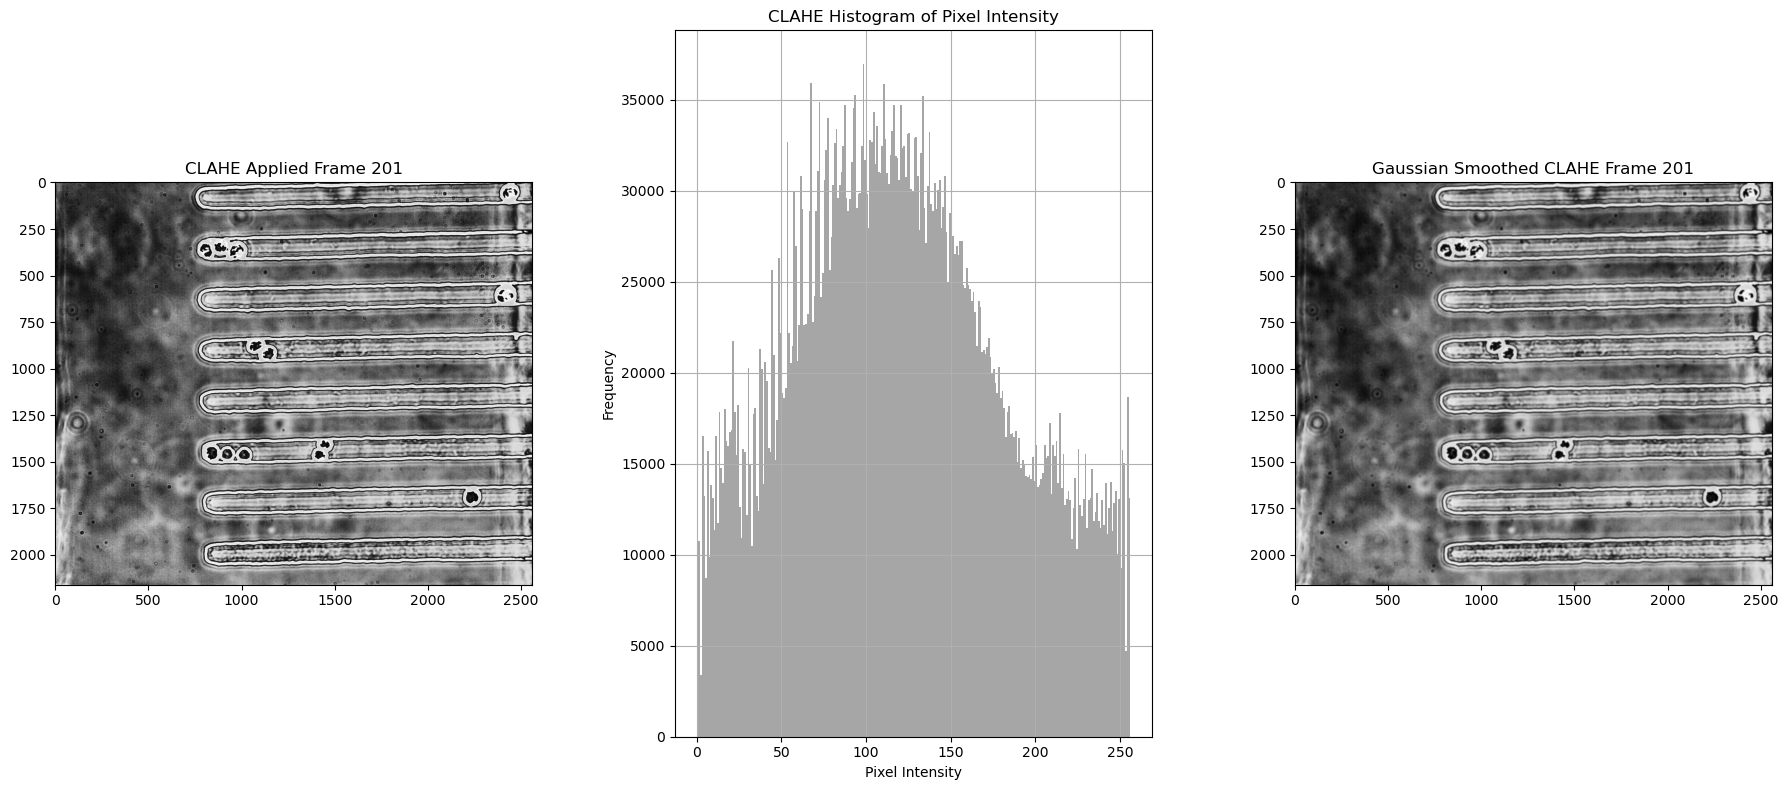

In [163]:
# Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_image = clahe.apply(equalized_image)

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 8))

# Display the CLAHE-applied image
axs[0].imshow(clahe_image, cmap='gray')
axs[0].set_title(f"CLAHE Applied Frame {frame_to_display + 1}")

# Calculate and display the equalized histogram
axs[1].hist(clahe_image.flatten(), bins=256, range=(0, 256), color='gray', alpha=0.7)
axs[1].set_xlabel('Pixel Intensity')
axs[1].set_ylabel('Frequency')
axs[1].set_title('CLAHE Histogram of Pixel Intensity')
axs[1].grid(True)

# Apply Gaussian noise reduction
smoothed_CLAHE_image = cv2.GaussianBlur(clahe_image, (15, 15), 0)  # Adjust kernel size eg. (5, 5) as needed, a higher number = more smoothing 
axs[2].imshow(smoothed_CLAHE_image, cmap='gray')
axs[2].set_title(f"Gaussian Smoothed CLAHE Frame {frame_to_display + 1}")

# Adjust layout for better spacing
plt.tight_layout()

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3)  # You can adjust the value as needed

# Show the plot
plt.show()


### Contrast stretching and sharpening: 
#### The cell below wil display the following:
- Contrast stretching of the orignal frame 
- Sharpening of the contrast stretched frame

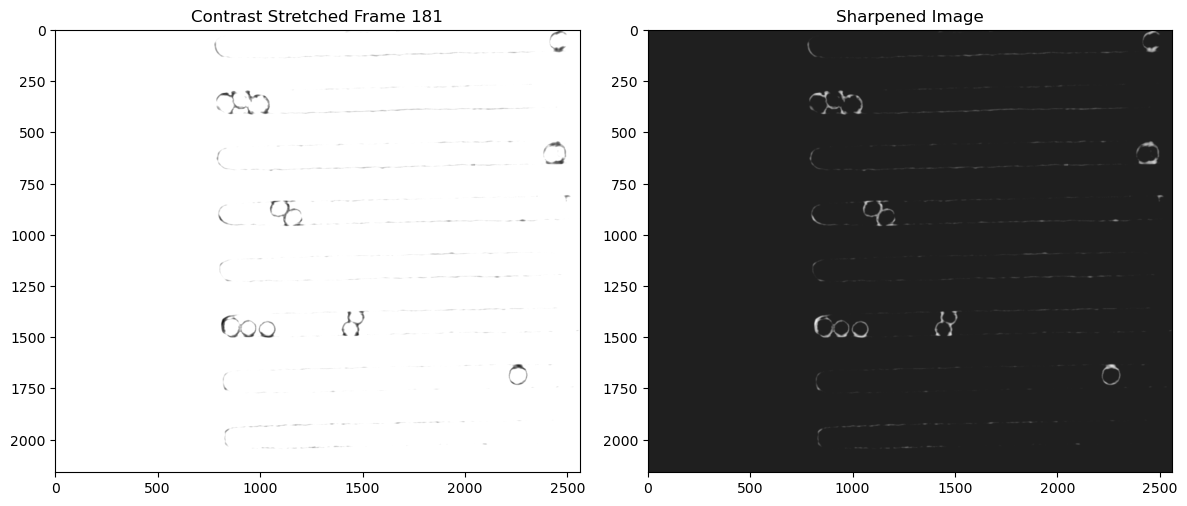

In [48]:
# Apply Contrast Stretching
"""pix: The original pixel value in the input image.
r1: The lower limit of the input pixel range.
s1: The corresponding output pixel value for pix when pix is in the range [0, r1].
r2: The upper limit of the input pixel range.
s2: The corresponding output pixel value for pix when pix is in the range (r1, r2]."""
def pixelVal(pix, r1, s1, r2, s2):
    if 0 <= pix <= r1:
        return (s1 / r1) * pix
    elif r1 < pix <= r2:
        return ((s2 - s1) / (r2 - r1)) * (pix - r1) + s1
    else:
        return ((255 - s2) / (255 - r2)) * (pix - r2) + s2

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Pixel value vectorization
pixelVal_vec = np.vectorize(pixelVal)
contrast_stretched = pixelVal_vec(tiff_data, 70, 0, 200, 255)

# Display the contrast-stretched image
axs[0].imshow(contrast_stretched, cmap='gray')
axs[0].set_title(f"Contrast Stretched Frame {frame_to_display + 1}")



# Apply sharpening using a kernel
#Takes each pixel and contrasts them against the surronding values
#Centre pixel: increase = more prononuced sharpening
#Surronding pixels: increase = more aggresive, but more noise
kernel = np.array([[-2, -2, -2],
                   [-2,  8, -2],
                   [-2, -2, -2]])

#Apply the sharpening
sharpened_contrast_stretched_image = cv2.filter2D(contrast_stretched, -1, kernel)


#save image
plt.imsave('C:/Users/micha/Desktop/Master_Project/contrast_stretched_image_101_gray.png', contrast_stretched, cmap='gray')


# Display the sharpened image
axs[1].imshow(sharpened_contrast_stretched_image, cmap='gray')
axs[1].set_title('Sharpened Image')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


### Dilation and Closing: 
#### The cell below wil display the following:
- CLAHE on the original frame 
- A histogram of pixel intensities of the CLAHE frame 
- Gaussian Smoothing of the CLAHE frame

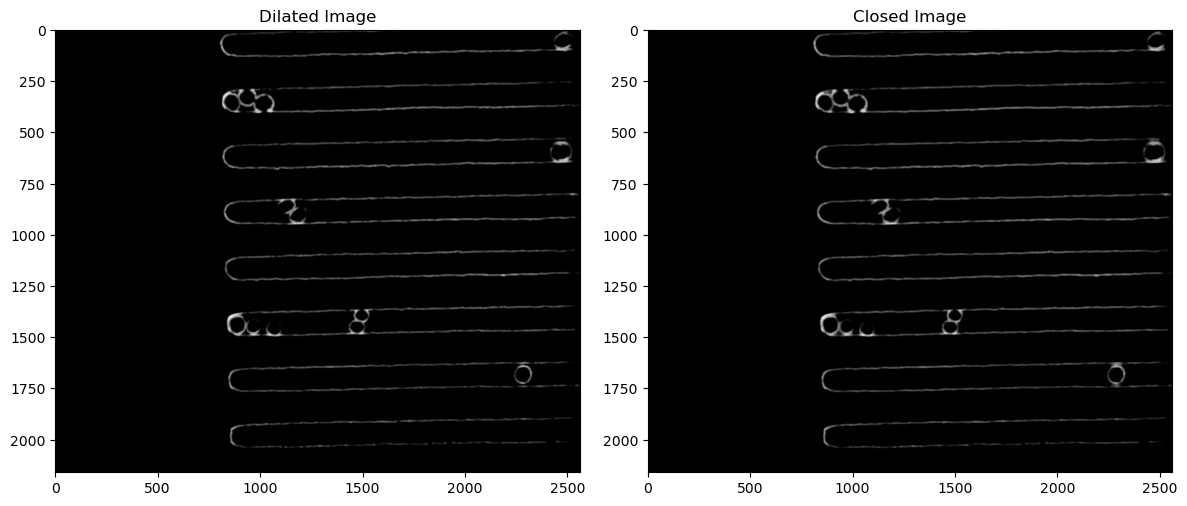

In [47]:
# Dilation
dilated_image = cv2.dilate(sharpened_contrast_stretched_image, kernel=np.ones((4, 4), np.uint8), iterations=1)

# Closing
kernel_size = 12 # change this for the closing-kernel values
closing_kernel = np.ones((kernel_size, kernel_size), np.uint8)
closed_image = cv2.morphologyEx(dilated_image, cv2.MORPH_CLOSE, closing_kernel)


# Normalize and convert the image to uint8 before saving
#normalized_image = cv2.normalize(dilated_image, None, 0, 255, cv2.NORM_MINMAX)
#normalized_image = np.uint8(normalized_image)


# Display the results
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(dilated_image, cmap='gray')
axs[0].set_title('Dilated Image')

axs[1].imshow(closed_image, cmap='gray')
axs[1].set_title('Closed Image')


# Save the closed image as a PNG
# Save the dilated image as a PNG using matplotlib
plt.imsave('C:/Users/micha/Desktop/Master_Project/dilated_image_101_gray.png', dilated_image, cmap='gray')


# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()




# Cell counting

### Cell counting segmentation of unprocessed image:
#### Using openCV 
#### Hough Circle Transform:
##### Works okay for growth channels/traps with fewer non clustered cells


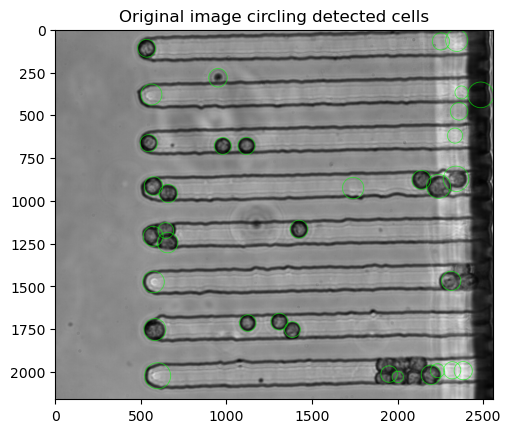

Number of cells: 35


NameError: name 'tiff_data' is not defined

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    # Read the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply GaussianBlur to smooth the image and reduce noise
    img = cv2.GaussianBlur(img, (5, 5), 0)

    return img

def find_cells(img):
    # Apply Hough Circle Transform to detect circles
    #Increase param1 to reduce the number of detected circles.
    #Increase param2 to reduce the number of false positives.
    circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, dp=1, minDist=45,
                               param1=40, param2=30, minRadius=30, maxRadius=100)

    if circles is not None:
        # Convert the circle coordinates to integer
        circles = np.uint16(np.around(circles))
        return circles[0, :]
    else:
        print("No circles detected.")
        return None

def visualize_cells(image_path, img, detected_objects):
    # Draw the contours or circles on a copy of the original image
    img_with_objects = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

    if detected_objects is not None:
        if detected_objects.shape[1] == 3:  # Circles
            for i in detected_objects:
                cv2.circle(img_with_objects, (i[0], i[1]), i[2], (0, 255, 0), 2)
        else:  # Contours
            cv2.drawContours(img_with_objects, detected_objects, -1, (0, 255, 0), 2)

    # Display the image with contours or circles
    plt.imshow(cv2.cvtColor(img_with_objects, cv2.COLOR_BGR2RGB))
    plt.title(f'Original image circling detected cells')
    plt.show()

def count_cells(image_path):
    # Preprocess the image
    img = preprocess_image(image_path)

    # Find cells (circles)
    cell_circles = find_cells(img)

    # Visualize the cells on the image
    visualize_cells(image_path, img, cell_circles)

    # Count the number of cells
    if cell_circles is not None:
        cell_count = len(cell_circles)
        return cell_count
    else:
        return 0

if __name__ == "__main__":
    # Replace 'C:/Users/micha/Desktop/Master_Project/contrast_stretched_image_101_gray.png' with your image file path
    image_path = 'C:/Users/micha/Desktop/Master_Project/original_frame_392.png'

    # Count cells and visualize the result
    cell_count = count_cells(image_path)

    print(f"Number of cells: {cell_count}")

    
# Display the orginal image
plt.imshow(tiff_data, cmap='gray')
plt.title("Original Frame")
plt.show()

# Additional Processing

### Applying thresholding (OTSU), wathershed and overlay function and saving overlay for downstream analysis

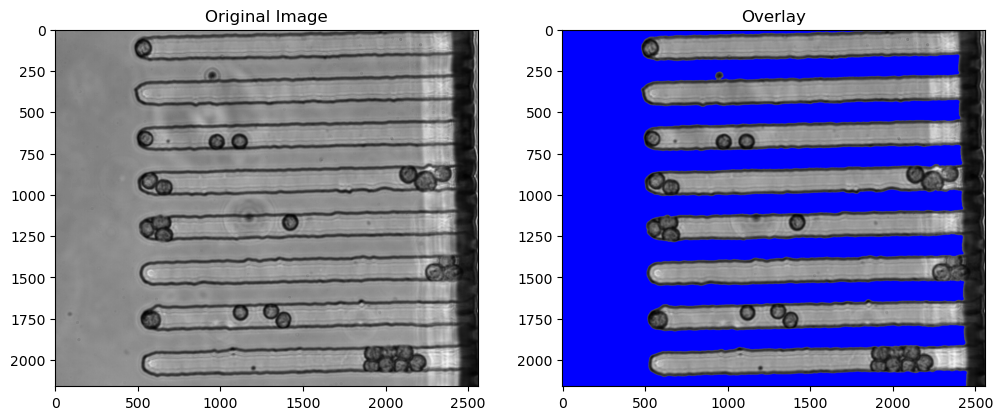

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import watershed
from scipy import ndimage

# Read the image in grayscale
image_path = 'C:/Users/micha/Desktop/Master_Project/original_frame_392.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Step 1: Apply Otsu's Thresholding
_, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Step 2: Perform Morphological Operations (optional)
kernel = np.ones((5, 5), np.uint8)
binary_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)  # Closing operation

# Step 3: Apply Distance Transform and Threshold
distance_transform = cv2.distanceTransform(binary_image, cv2.DIST_L2, 3)
_, sure_fg = cv2.threshold(distance_transform, 0.7 * distance_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)

# Step 4: Finding Sure Background
sure_bg = cv2.dilate(binary_image, kernel, iterations=3)

# Step 5: Finding Unknown Region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Step 6: Label Markers for Watershed Segmentation
_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# Step 7: Apply Watershed Algorithm
labels = watershed(-distance_transform, markers, mask=binary_image)

# Overlay the segmentation on the original image
overlay = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
overlay[labels > 1] = [0, 0, 255]  # Color the segmented regions in red

# Save the overlay image as a PNG
cv2.imwrite('C:/Users/micha/Desktop/Master_Project/overlay_image_392.png', overlay)

# Visualize the original image and the overlay
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(overlay)
plt.title('Overlay')

plt.show()


### 1-D projection of pixel values across X-axis and finding peaks to be able to crop out growth channels.

Image Shape: (2560, 2160)
Projection Shape: (2160,)


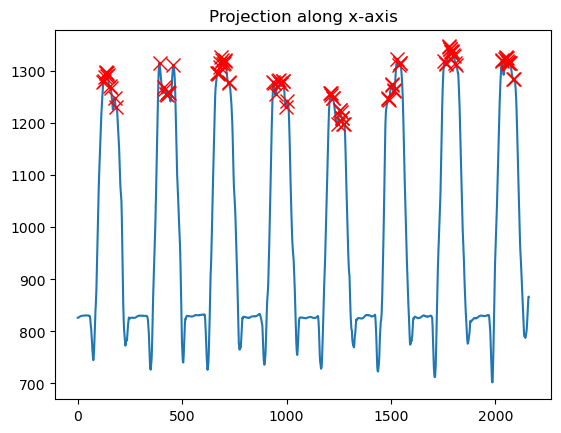

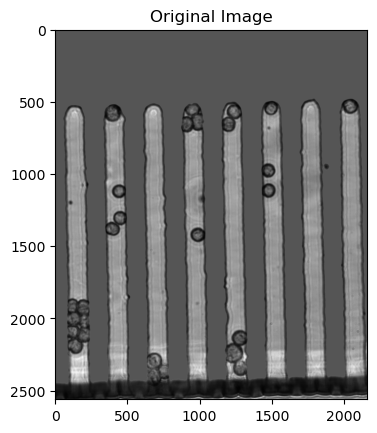

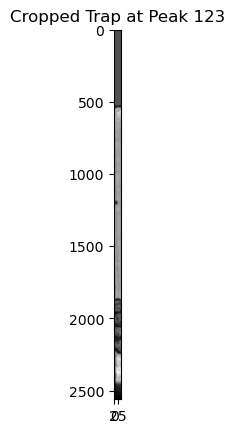

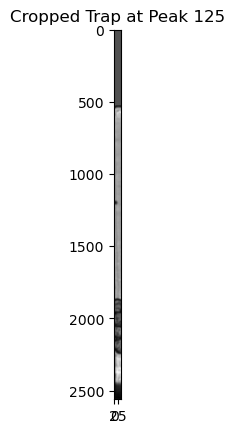

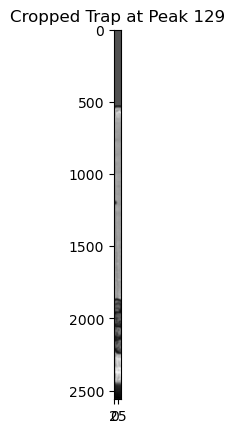

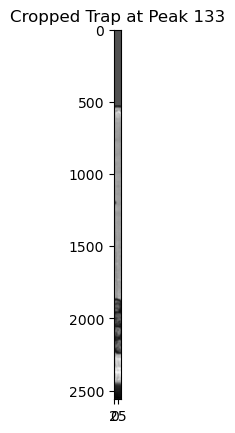

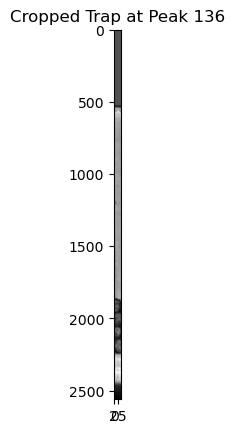

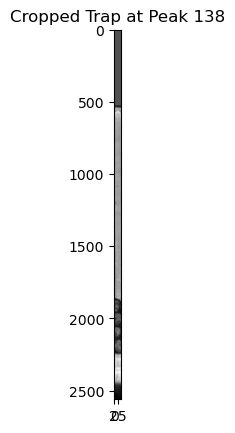

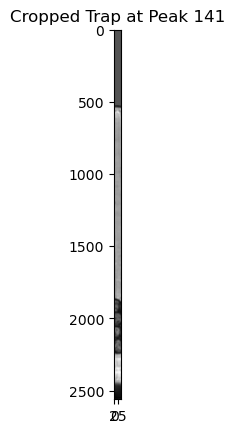

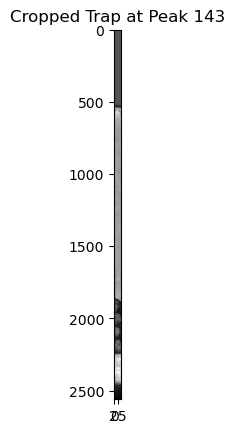

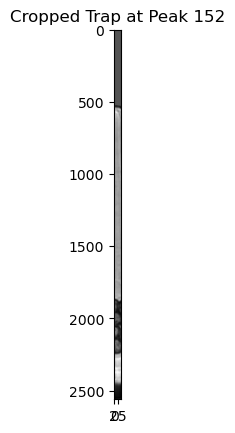

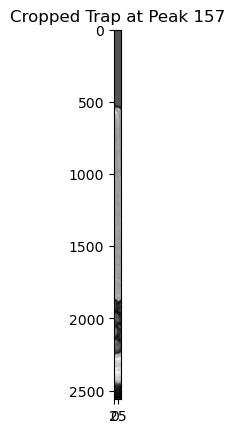

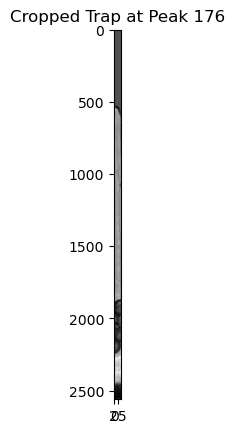

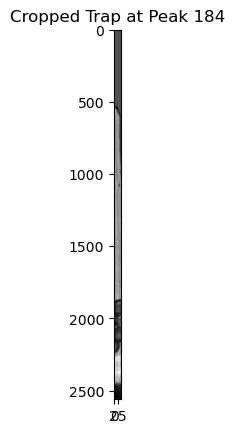

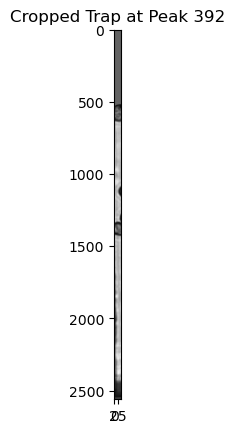

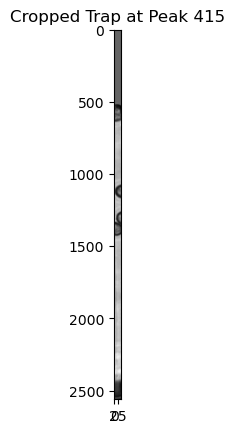

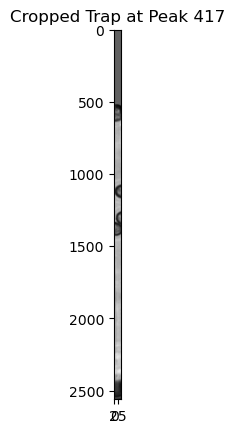

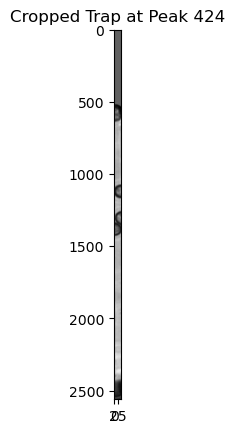

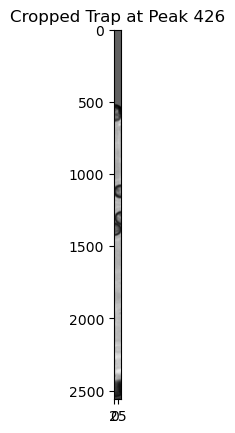

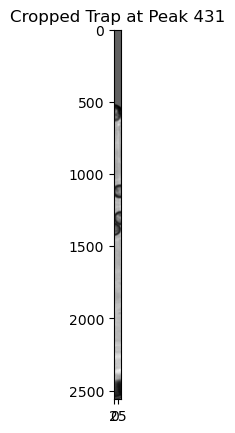

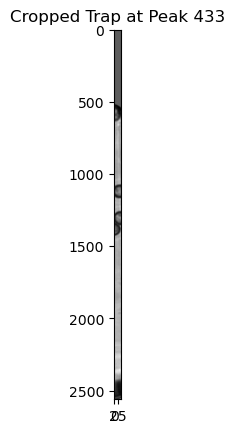

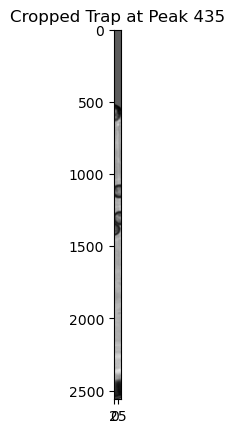

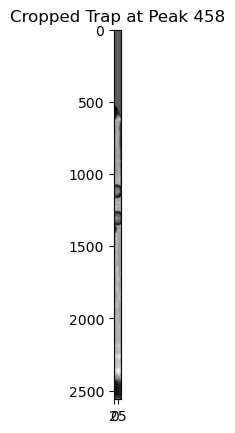

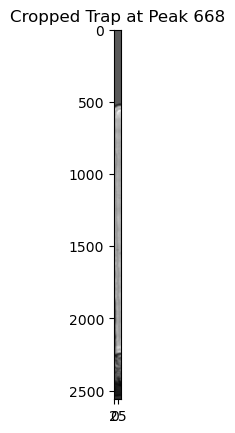

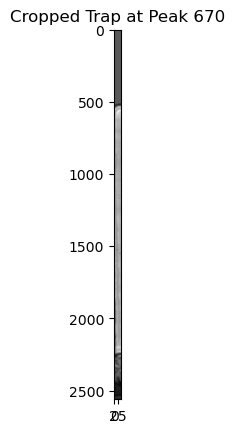

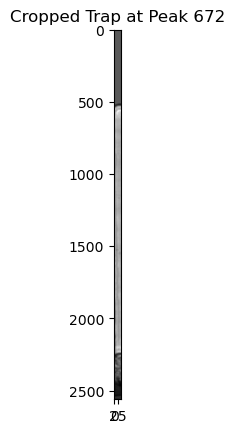

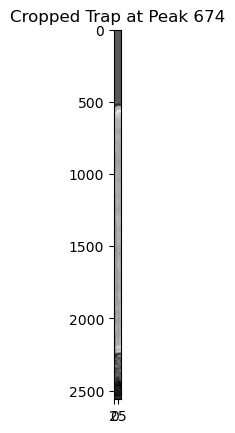

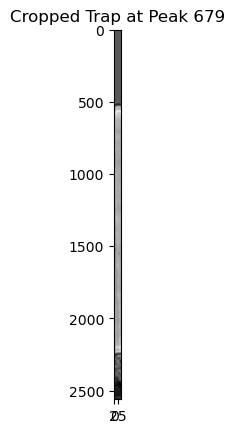

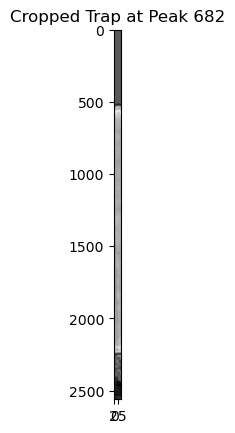

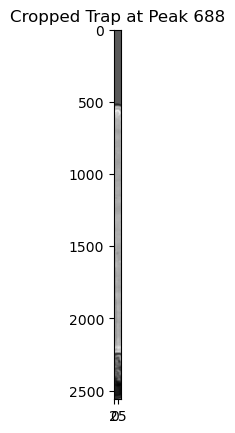

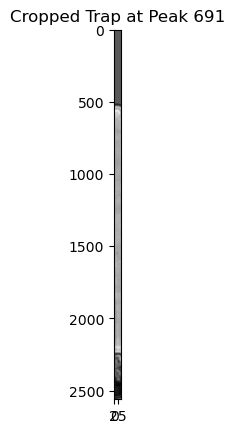

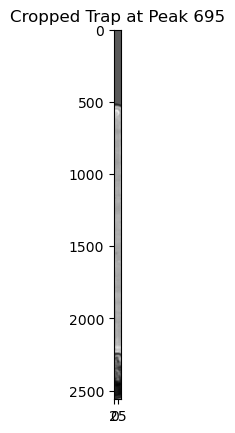

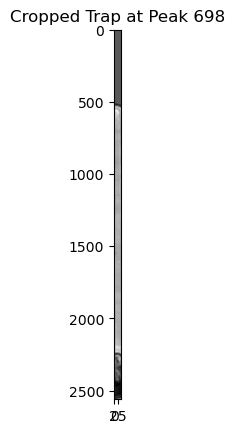

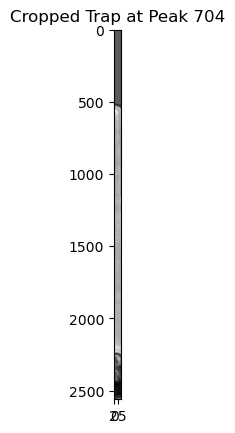

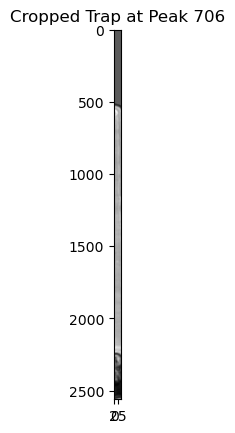

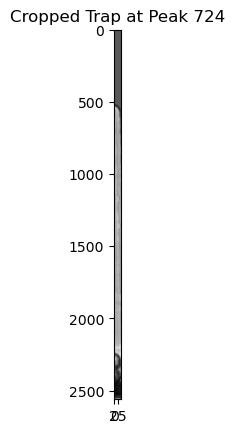

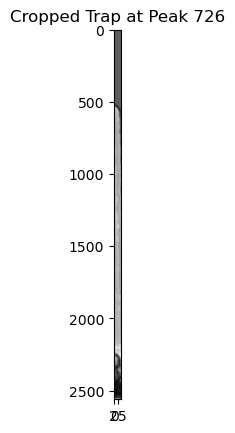

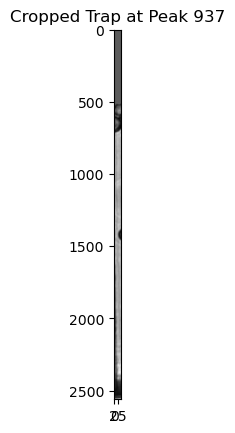

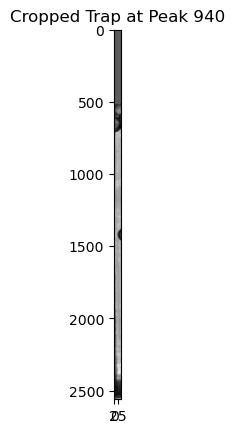

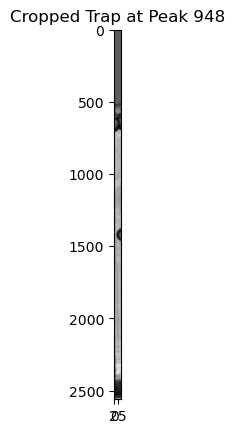

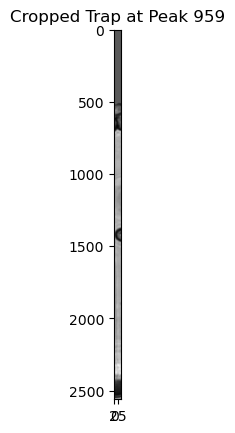

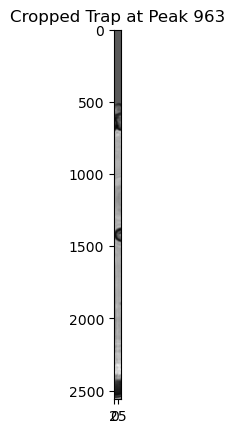

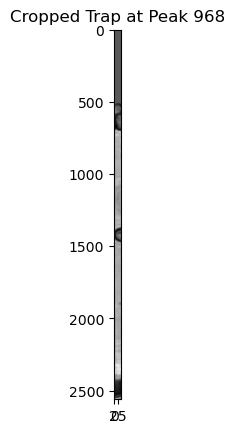

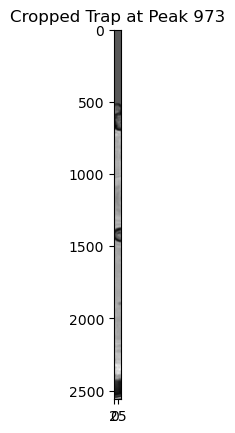

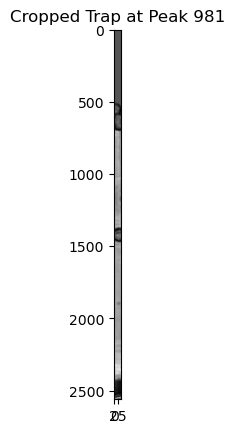

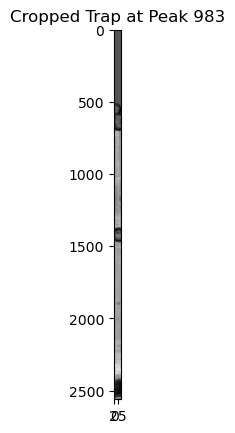

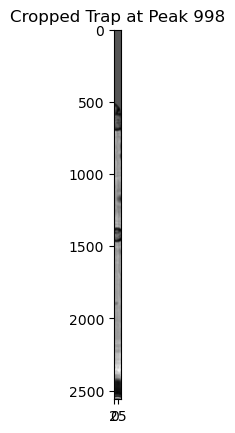

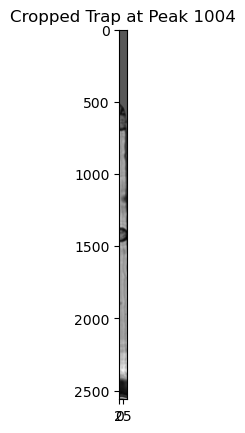

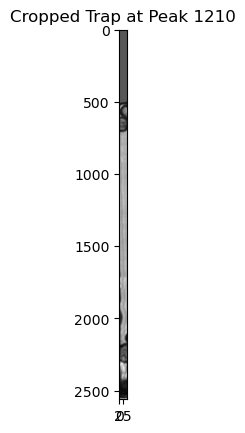

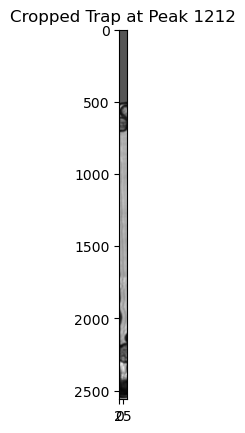

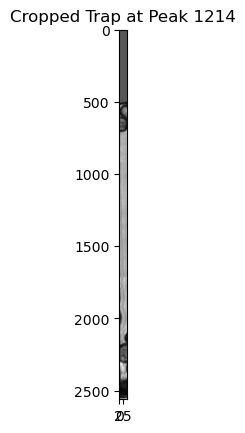

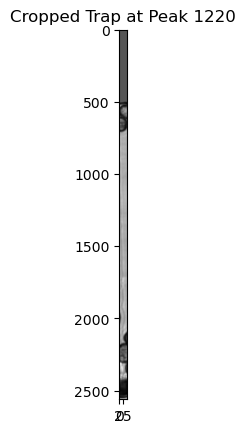

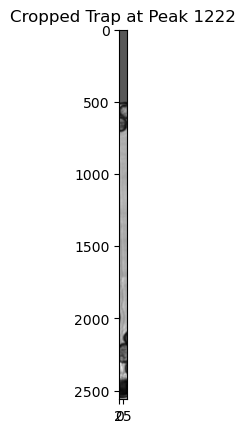

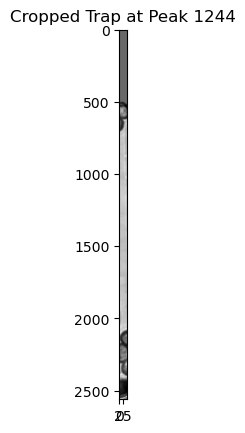

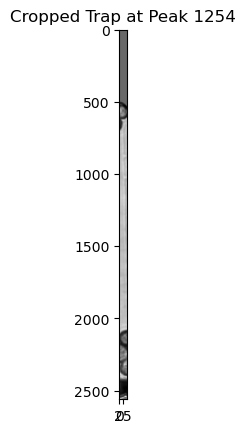

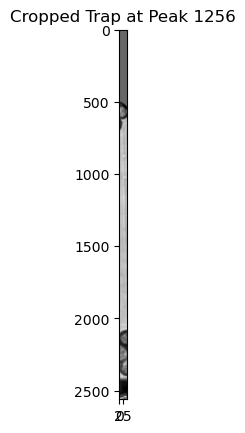

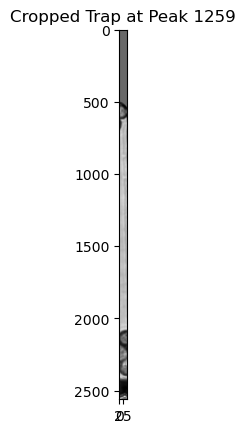

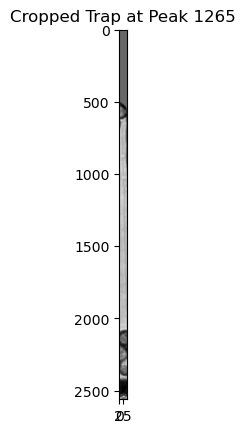

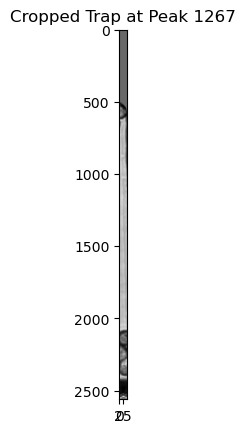

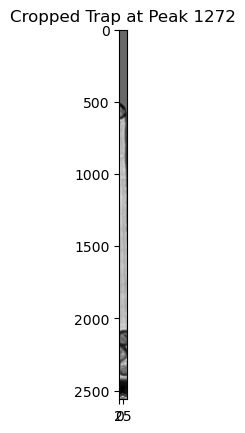

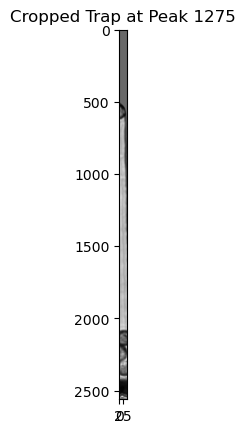

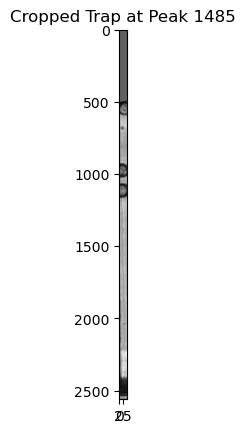

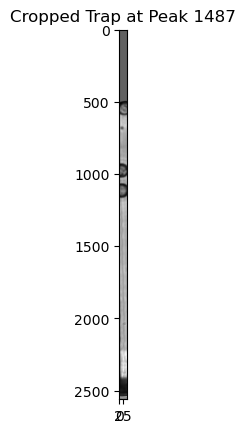

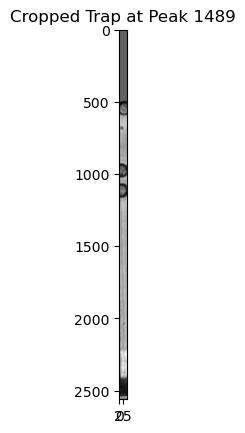

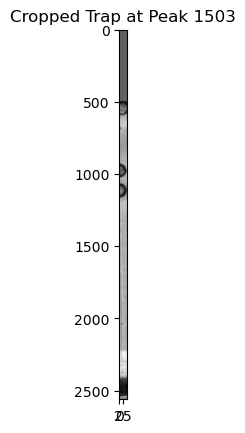

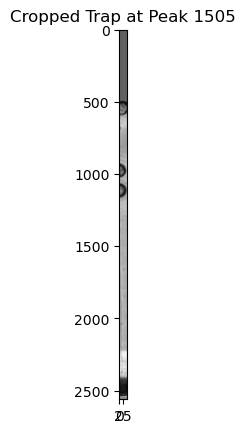

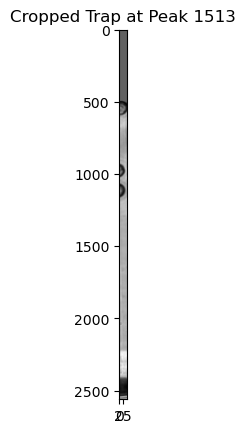

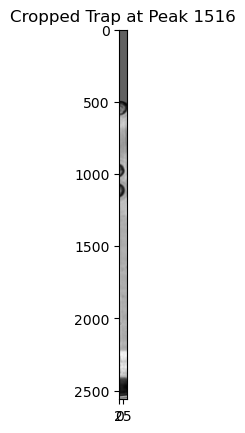

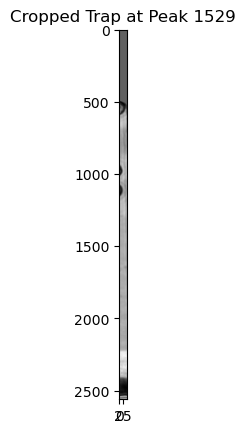

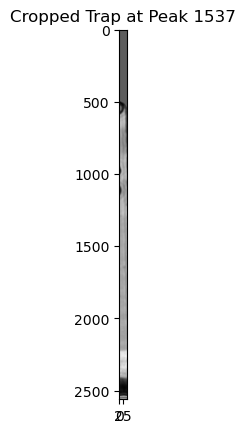

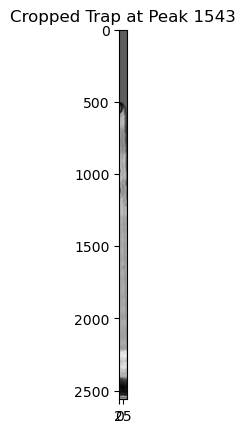

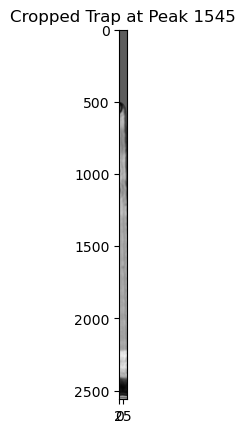

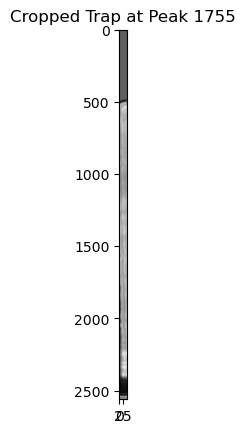

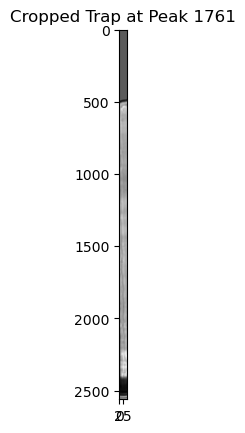

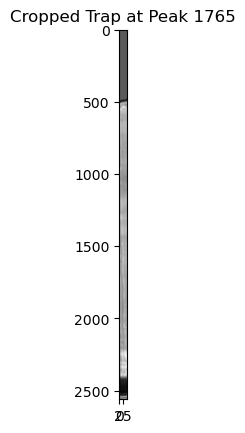

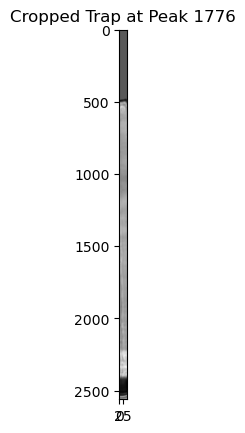

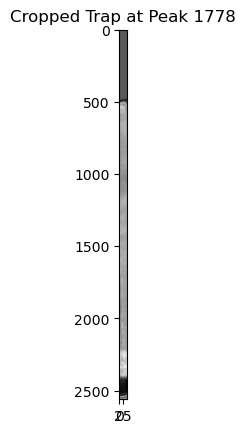

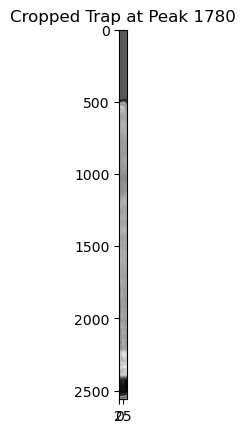

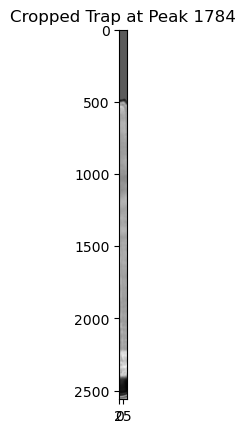

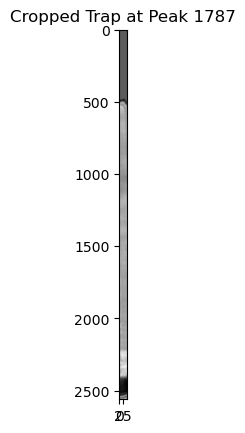

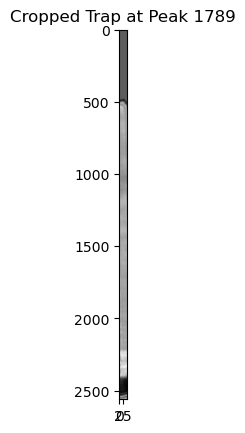

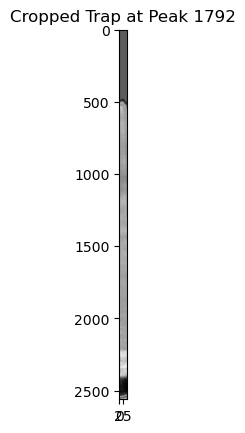

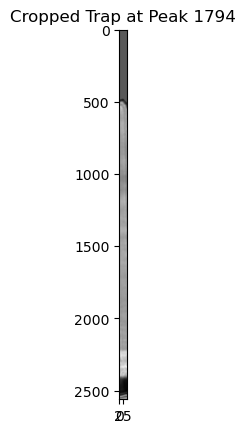

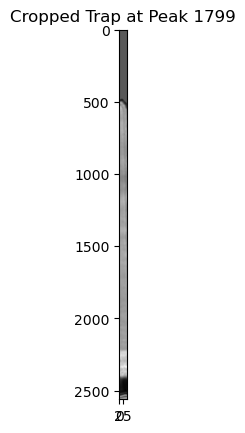

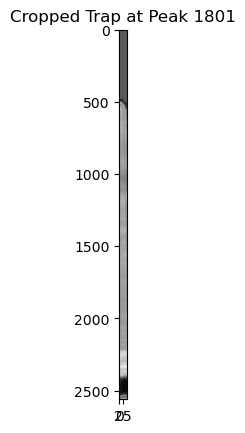

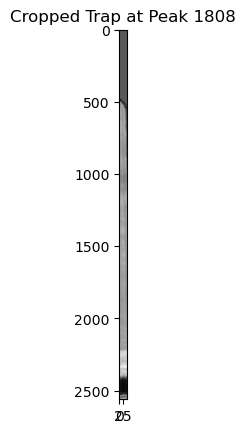

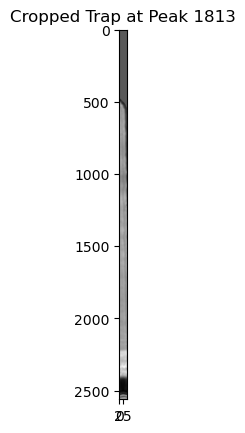

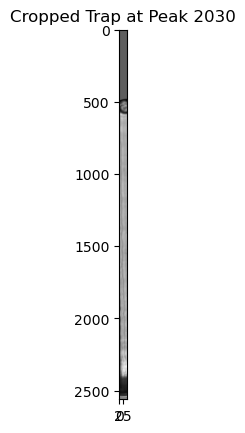

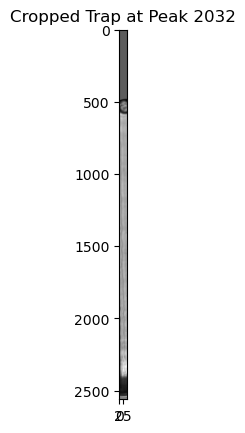

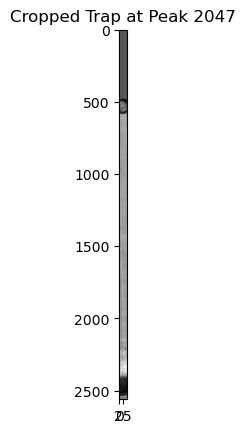

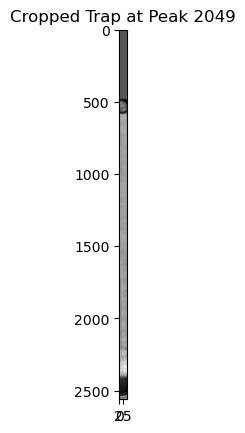

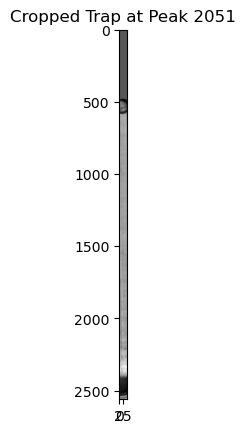

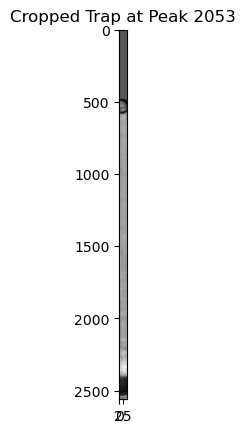

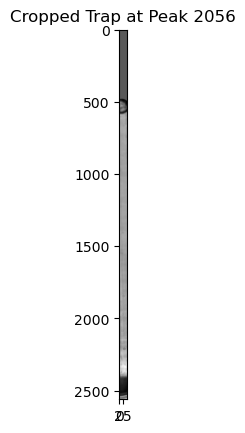

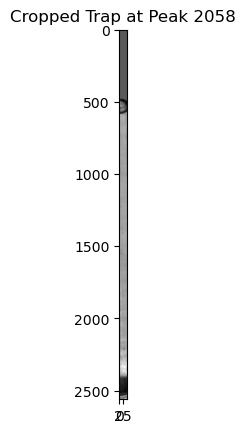

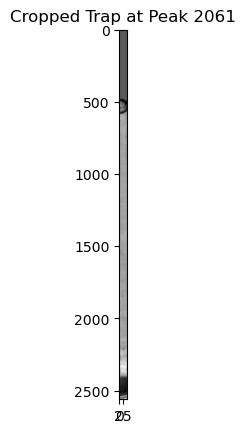

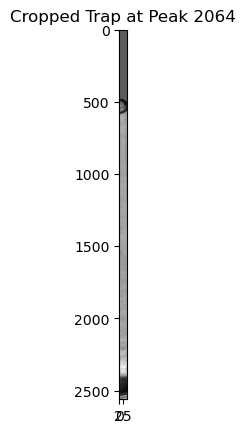

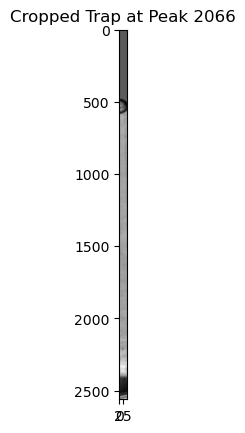

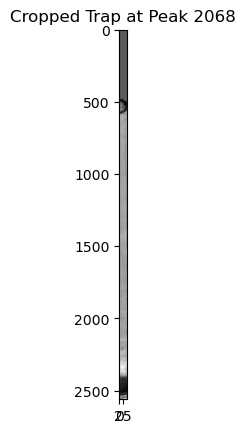

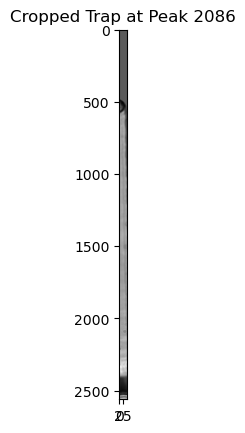

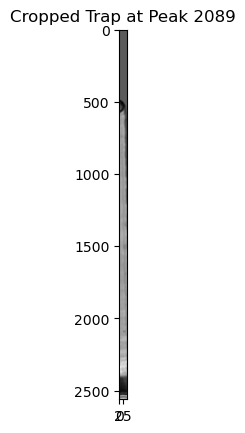

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from matplotlib.image import imread

# Step 0: Read the image using an appropriate method
image_thing_path_3 = 'C:/Users/micha/Desktop/Master_Project/overlay_image_392_flipped.png'
image_thing_3 = imread(image_thing_path_3)

# Convert the image to grayscale if it has three color channels
if image_thing_3.ndim == 3:
    image_thing_3 = np.mean(image_thing_3, axis=-1)

# Check the shape of the image
print("Image Shape:", image_thing_3.shape)

# Step 1: Create a projection along the x-axis
proj_3 = np.sum(image_thing_3, axis=0)

# Check the shape of the projection
print("Projection Shape:", proj_3.shape)

# Step 2: Plot the projection for visualization
plt.plot(proj_3)
plt.title('Projection along x-axis')

# Step 3: Find peaks in the projection
threshold = 1000  # Adjust the threshold based on your data
peaks_3, _ = find_peaks(proj_3, height=threshold)

# Mark peaks on the projection plot
plt.plot(peaks_3, proj_3[peaks_3], "x", color="red", markersize=10)

plt.show()

# Step 4: Crop around each trap and generate figures
wh = 25  # Adjust this based on the width you desire

# Create a figure for the original image
plt.figure()
plt.imshow(image_thing_3, cmap='gray')
plt.title('Original Image')
plt.show()

# Create figures for each channel
for peak_3 in peaks_3:
    # Crop around the trap
    trap_cropped = image_thing_3[:, peak_3 - wh:peak_3 + wh]

    # Display the cropped trap
    plt.imshow(trap_cropped, cmap='gray')
    plt.title(f'Cropped Trap at Peak {peak_3}')
    plt.show()


# NAPARI TEST